In [2]:
import matplotlib.pyplot as plt # import the "pyplot" library as the "plt" handle
import numpy as np # import the "numpy" library as the "np" handle, where lots of functions live

/home/nbuser/anaconda3_410/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/home/nbuser/anaconda3_410/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [3]:
def g(y):
    gSurface=9.8  # m/s^2
    earthRadius= 6700000 # m
    g= gSurface/(1+(y/earthRadius)**2)
    return g;

In [4]:
def rho(y):
     rhoSurface = 1.15 # kg/m^3
     molecularMass = 28*1.16*10**(-27) # molecular mass of nitrogen (kg)
     boltzmannConstant = 1.38*10**(-23) #  in J/K
     temperature = 300 # in Kelvin
     gravitationalPotentialEnergy= molecularMass*g(y)*y  # in J
     thermalEnergy = boltzmannConstant* temperature; # in J
     rho = rhoSurface*np.exp(- gravitationalPotentialEnergy/thermalEnergy)  # in kg/m^3
     return rho

In [20]:
initialRocketMass =7.4*10**(5) # in kilograms
thrustForce= 7.5*10**6 # in newtons
exhaustPropellantSpeed = 2900 ## in meter per second
propellantConsumptionRate= thrustForce/exhaustPropellantSpeed ## in kg/s

crossSection= 5.0 # in meter square
C=0.5 # dimensionless

# rockets attributes
y=0
v=0
a=0
p=0
m=initialRocketMass
propellantFirstStageMass = 0.40*m
boosterFirstStageMass = 0.05*m
propellantSecondStageMass = 0.40*m

# arrays
ys=[]
vs=[]
ps=[]
ms=[]

dt=0.1
timeRange = np.arange(0,780,dt);

for t in timeRange:

    if ( m>initialRocketMass-propellantFirstStageMass - boosterFirstStageMass- propellantSecondStageMass):
        forceThrust= exhaustPropellantSpeed*propellantConsumptionRate
        
        m=m-propellantConsumptionRate*dt  # mass of rocket
        
        if ( (m<initialRocketMass-propellantFirstStageMass)  & (m>initialRocketMass-propellantFirstStageMass-boosterFirstStageMass)):
            m=m-boosterFirstStageMass
            print('ejecting boosters')
    else:
        forceThrust=0
        
    forceGravity= -m*g(y)
    forceDrag= -1/2*C*rho(y)*crossSection*v**2;
    
    changeInMomentum= forceThrust + forceGravity + forceDrag;
    a = changeInMomentum/m
    
    y= y + v*dt+ 1/2*a*dt**2
    v= v + a*dt
    
    ##print( "y=",y," v=",v," a=",a, " m=",m, " thrust=",forceThrust, "drag=", forceDrag)    
    ys.append(y)
    vs.append(v)
    ps.append(p)
    ms.append(m)

ejecting boosters


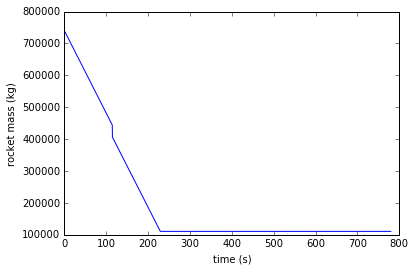

In [30]:

plt.plot(timeRange,ms)
plt.ylabel( 'rocket mass (kg)')
plt.xlabel( 'time (s)')
plt.show()


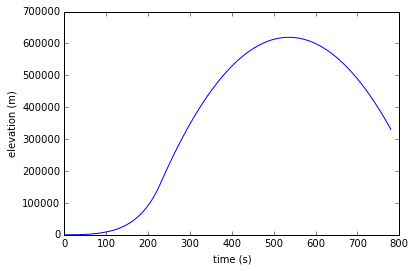

In [31]:
plt.plot(timeRange,ys)
plt.ylabel( 'elevation (m)')
plt.xlabel( 'time (s)')
plt.show()

In [32]:
maximumHeight=np.max(ys)
print( 'maximum height of the rocket', maximumHeight/1000 , 'km')

maximum height of the rocket 619.396309558 km
